In [23]:
import json
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

In [24]:
# Load JSON file
directory_name = "EpochSweep_100_randomnonenone_2024_12_09_02_21_17"  # Replace experiment name
file_path = os.path.join(directory_name, f"{directory_name}.json")
with open(file_path, "r") as f:
    data = json.load(f)

In [25]:
# Visualization 1: Client Accuracy Over Rounds
def plot_client_accuracy_over_rounds():
    rounds = list(data["client_results"].keys())
    clients = list(data["client_results"]["1"].keys())  # Assuming all rounds have the same clients

    client_accuracy = {client: [] for client in clients}
    for round_num in rounds:
        for client in clients:
            client_data = data["client_results"][round_num][client]
            client_accuracy[client].append(client_data["accuracy"])

    plt.figure(figsize=(10, 6))
    for client, accuracies in client_accuracy.items():
        plt.plot(rounds, accuracies, label=f"Client {client}")
    plt.title("Client Accuracy Over Rounds")
    plt.xlabel("Round")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True)
    output_dir =  directory_name 
    os.makedirs(output_dir, exist_ok=True)  
    plt.savefig(os.path.join(output_dir, "Client Accuracy Over Rounds.png"))
    plt.show()

Plotting Client Accuracy Over Rounds...


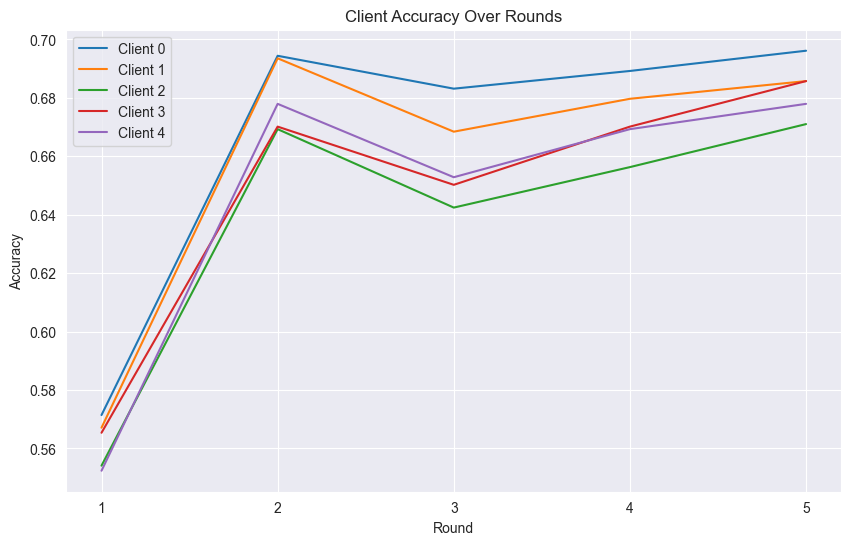

In [26]:
print("Plotting Client Accuracy Over Rounds...")
plot_client_accuracy_over_rounds()

In [27]:
# Visualization 2: Client Metric Variability
def plot_client_metric_variability(metric="accuracy"):
    rounds = list(data["client_results"].keys())
    clients = list(data["client_results"]["1"].keys())

    variability_data = []
    for round_num in rounds:
        round_metrics = [data["client_results"][round_num][client][metric] for client in clients]
        variability_data.append(round_metrics)

    plt.figure(figsize=(10, 6))
    plt.boxplot(variability_data, tick_labels=rounds)
    plt.title(f"Client {metric.capitalize()} Variability Across Rounds")
    plt.xlabel("Round")
    plt.ylabel(metric.capitalize())
    plt.grid(True)
    output_dir =  directory_name 
    os.makedirs(output_dir, exist_ok=True)  
    plt.savefig(os.path.join(output_dir, f"Client Metric Variability ({metric})"+".png"))
    plt.show()

Plotting Client Metric Variability (Accuracy)...


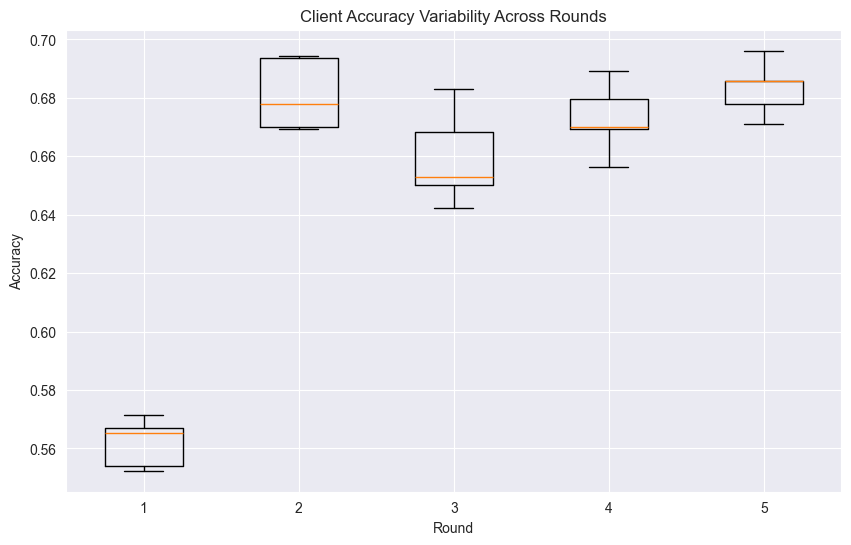

In [28]:
print("Plotting Client Metric Variability (Accuracy)...")
plot_client_metric_variability(metric="accuracy")

In [29]:
# Visualization 4: Confusion Matrix Per Client
def plot_confusion_matrix_per_client(client_id="0", round_index="1"):
    client_data = data["client_results"][round_index][client_id]
    labels = client_data["labels"]
    predictions = client_data["predictions"]

    cm = confusion_matrix(labels, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix - Client {client_id}, Round {round_index}")
    output_dir =  directory_name 
    os.makedirs(output_dir, exist_ok=True)  
    plt.savefig(os.path.join(output_dir, f"Confusion Matrix - Client {client_id}, Round {round_index}"+".png"))
    plt.show()

Plotting Confusion Matrix for Client 0 in Round 4...


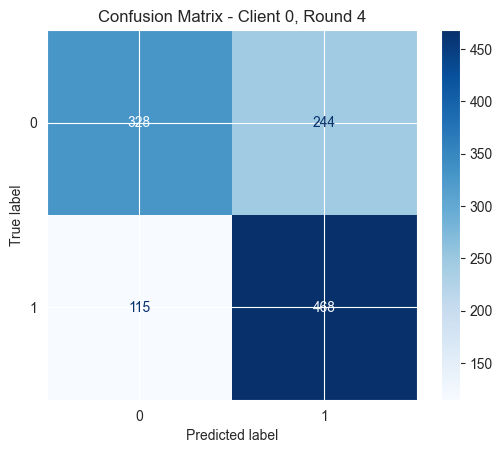

In [30]:
print("Plotting Confusion Matrix for Client 0 in Round 4...")
plot_confusion_matrix_per_client(client_id="0", round_index="4")